In [102]:
import numpy as np
from calculations import get_expected_value
import config as cfg
from tqdm import tqdm 
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [16, 10]

In [26]:
def translate_polar_to_kart(r, phi):
    x, y = r*np.cos(phi), r*np.sin(phi)
    return x, y

In [27]:
def print_dict(d):
    for i, val in d.items():
        print(f"{i} \t = {val} ")

Hier beginnen die Berechnungen unter der Annahme, dass auf das Zentrum des Triple Feldes der jeweiligen Zahl geworfen wird

In [28]:
def dummy():
    result = {}

    # Bullseye
    r = 0
    phi = 0
    cfg.mu = translate_polar_to_kart(r, phi)
    result["Bull"] = get_expected_value(None)

    r = (cfg.triple_inner + cfg.triple_outer)/2
    # for i in tqdm(range(20)):
    for i in range(20):
        phi = i*(18/360*2*np.pi)
        cfg.mu = translate_polar_to_kart(r, phi)
        result[cfg.numbers[i]] = get_expected_value(None) 

    return result

In [29]:
result = dummy()

In [141]:
sigma_list = [i for i in range(1, 100)]

In [45]:
r = []
for i in tqdm(range(1, 100)):
    cfg.sigma = i
    # print(cfg.sigma)
    result = dummy()
    r.append(result)


100%|██████████| 99/99 [06:05<00:00,  3.69s/it]


In [142]:
max_val_list = []
for i, d in enumerate(r):
    val = max(d, key=d.get)
    max_val_list.append(val)
    print(f"sigma: {(i+1)}: \t {max(d, key=d.get)}  \t --> {d[val]}".expandtabs(2))

sigma: 1:    20    --> 59.99885254702529
sigma: 2:    20    --> 58.1813390254099
sigma: 3:    20    --> 52.70508958434908
sigma: 4:    20    --> 47.30886652592301
sigma: 5:    20    --> 43.006016393550965
sigma: 6:    20    --> 39.54545894731034
sigma: 7:    20    --> 36.587444649412355
sigma: 8:    20    --> 33.949806950180914
sigma: 9:    20    --> 31.563773562368972
sigma: 10:   20    --> 29.405200401860032
sigma: 11:   20    --> 27.460489494207142
sigma: 12:   20    --> 25.714814796271583
sigma: 13:   20    --> 24.153399248541145
sigma: 14:   20    --> 22.760308514902675
sigma: 15:   20    --> 21.52070814365933
sigma: 16:   20    --> 20.420486801800678
sigma: 17:   19    --> 19.50302434032287
sigma: 18:   19    --> 18.75229109256304
sigma: 19:   19    --> 18.09331177693925
sigma: 20:   19    --> 17.516833202884886
sigma: 21:   19    --> 17.01278368196838
sigma: 22:   19    --> 16.571929529002286
sigma: 23:   19    --> 16.18559979383088
sigma: 24:   19    --> 15.846410275532367
sigm

In [143]:
print(max_val_list)

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull']


In [144]:
n20 = []
n19 = []
n7 = []
nBull = []
for i, d in enumerate(r):
    n20.append(d[20])
    n19.append(d[19])
    n7.append(d[7])
    nBull.append(d["Bull"])


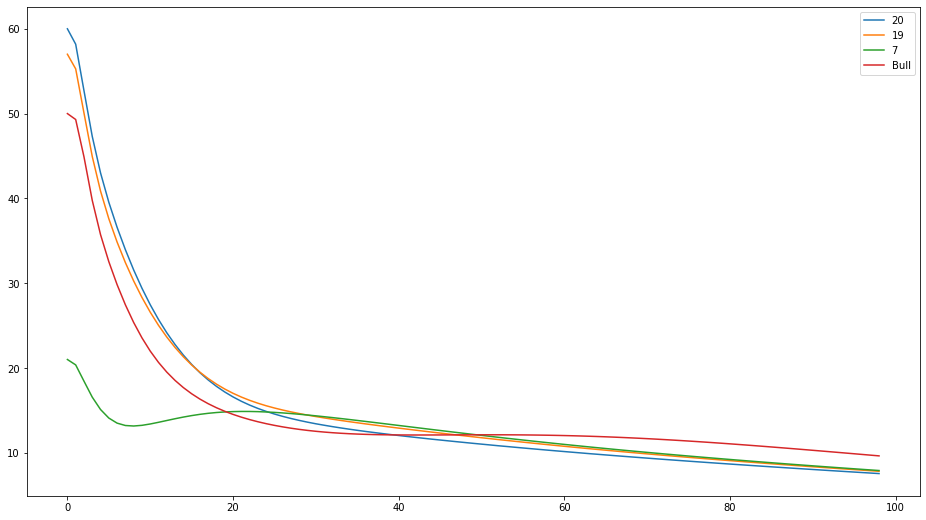

In [138]:
plt.plot(n20, label="20")
plt.plot(n19, label="19")
plt.plot(n7, label="7")
plt.plot(nBull, label="Bull")
plt.legend()

Text(0, 0.5, 'E[X]')

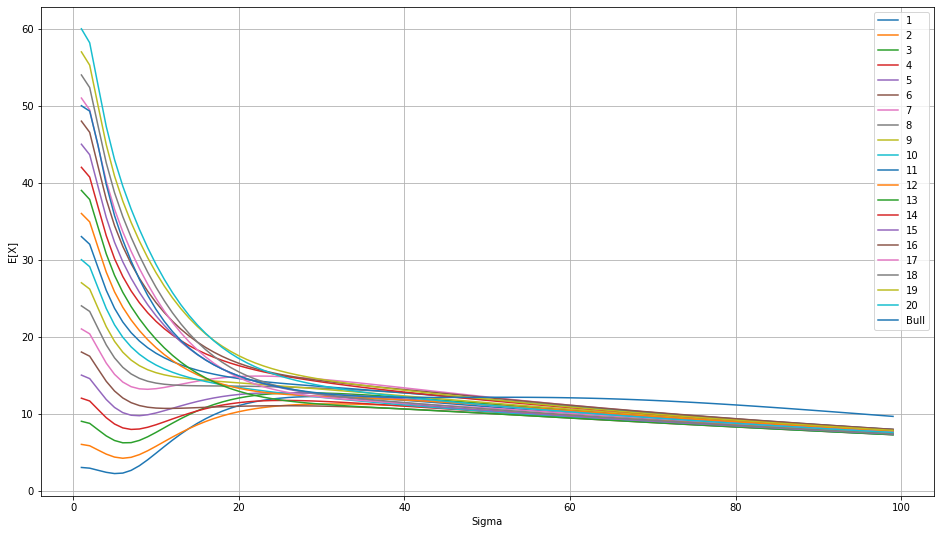

In [145]:
plt.rcParams['figure.figsize'] = [16, 9]
ax1 = plt.subplot()
for i in range(1, 21):
    hist = []
    for var in range(len(r)):
        hist.append(r[var][i])
    ax1.plot(sigma_list, hist, label=i)

ax1.plot(sigma_list, nBull, label="Bull")
ax1.grid(True)
ax1.legend()
ax1.set_xlabel("Sigma")
ax1.set_ylabel("E[X]")

Text(49.5, -1.5, '50')

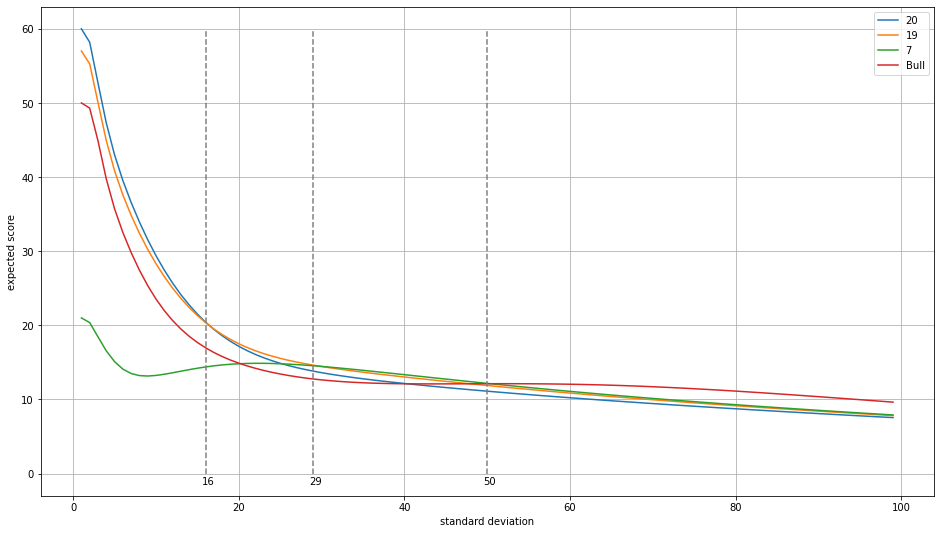

In [137]:
max_val_list
max_val_list_no_duplicates = list(dict.fromkeys(max_val_list))
ax2 = plt.subplot()
for key in max_val_list_no_duplicates:
    hist = []
    for var in range(len(r)):
        hist.append(r[var][key])
    ax2.plot(sigma_list, hist, label=key)

ax2.grid(True)
ax2.legend()
ax2.set_xlabel("standard deviation")
ax2.set_ylabel("expected score")

# Zeichnen der Übergangsgrenzen
ax2.plot([16, 16], [0, 60], '--', color="gray")
ax2.text(15.5, -1.5, r'16')
ax2.plot([29, 29], [0, 60], '--', color="gray")
ax2.text(28.5, -1.5, r'29')
ax2.plot([50, 50], [0, 60], '--', color="gray")
ax2.text(49.5, -1.5, r'50')

In [146]:
for i, val in enumerate(max_val_list):
    if i > 0 and val != max_val_list[i-1]:
        print(i)

16
29
50


In [97]:
print(max_val_list)

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull']


In [147]:
import json 

with open("file.json", "w") as f:
    json.dump(r, f, indent=2)
    

In [148]:
r[10][20]

27.460489494207142